# L1 or Lasso Regularization

In the case of the two-feature linear regression scenario we were looking at in the previous exercise, our new loss function for L1 regularization looks as follows:

$$\frac{1}{n}\sum_{i=1}^{n}(y_i - b_0 - b_1 x_{1i} - b_2 x_{2i})^2 + a * (|b_1|+|b_2|)$$

Minimizing this new loss function essentially means restricting the size of the regularization term while minimizing the old loss function. Let’s say that our regularization term can take a maximum value, s:

$$ |b_1|+|b_2| <= s$$

This is equivalent to confining our coefficients to a surface around the origin bounded by 4 lines : b1+b2 = s, b1-b2 = s, b2-b1 = s and -b1-b2 = s.

If we plot these four lines as with b1 and b2 as X and Y axes respectively, we get the diamond shaped region. We have chosen a value of s = 50 for this - this means that either coefficient can have a maximum value of 50. The choice of s is deeply tied to the choice of alpha as they are inversely related.

The value of (b1,b2) that satisfies the regularization constraint while minimizing the loss function is denoted by the white dot. Notice that it is exactly at the tip of the diamond where it intersects with a contour from our loss function. It also happens to fall exactly on the X axis, thus setting the value of b2 to 0!

Why is this the point that minimizes the new loss function? Remember that the goal here is to minimize the original loss function while meeting the regularization constraint. We still want to be as close to the center of the contours (the original loss function minimum) as possible. The point that’s closest to the center of the contours while simultaneously lying within the regularization surface boundary is the white dot!

The word Lasso is actually an _acronym_ for __“Least Absolute Shrinkage and Selection Operator”__ - it shrinks the absolute value of coefficients and selects parameters by way of setting some of the coefficients to zero. If the coefficient of a regression model is set to zero, it means that we’ve pretty much eliminated the feature associated with it. In models with a high number of features, lasso regularization tends to set a significant fraction of its parameters to zero, thus acting as a feature selection method.

# Lasso Regularization (contd.)

How does this extend to a multiple feature dataset? The loss function for a multiple linear regression case with m features looks as follows:

$$
\text{L1 Loss} = \frac{1}{n} \sum_{i=1}^n \left( y_i - b_0 - b_1 x_{1i} - b_2 x_{2i} - \dots - b_m x_{mi} \right)^2 
+ \alpha \cdot \left( |b_1| + |b_2| + |b_3| + \dots + |b_m| \right)
$$

We’re going to examine this by reapplying a multiple linear regression model to the student performance dataset we were looking at earlier on in the lesson — only this time, we are going to do this with L1 regularization. A quick reminder that our original unregularized coefficients look as shown in the image below:

Lasso (L1) Training Error:  3.0118464559476825
Lasso (L1) Training Error: 4.272174214435372


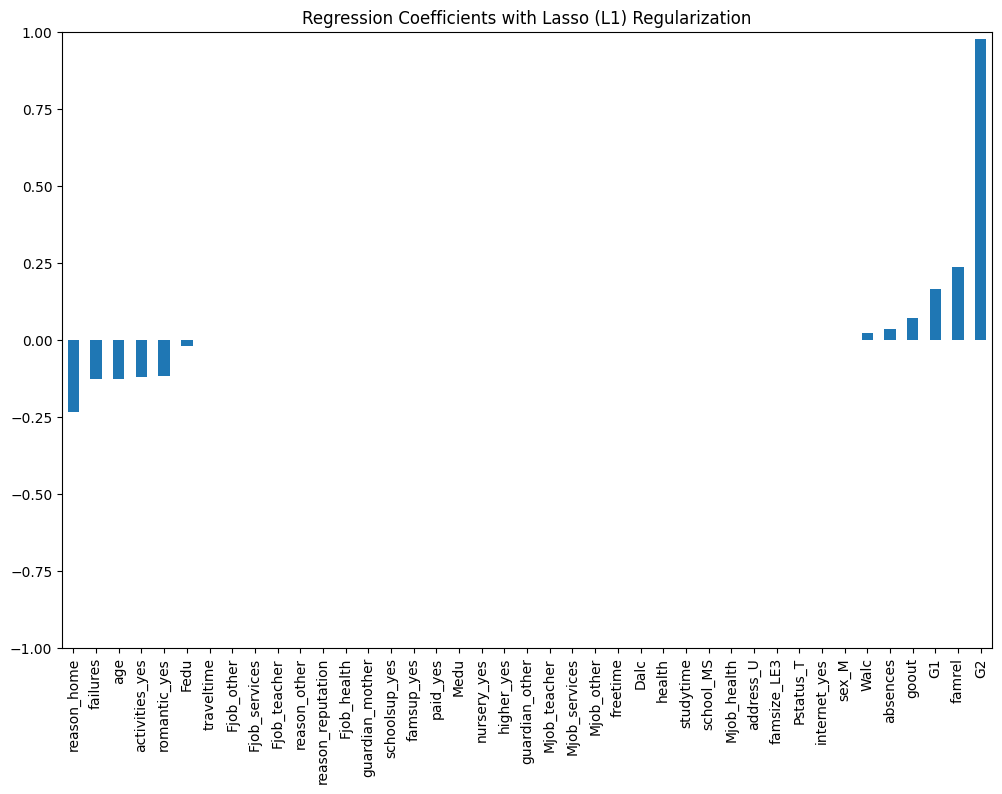

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("./student_math.csv")
y = df['Final_Grade']
X = df.drop(columns = ['Final_Grade'])

# 1. Train-test split and fitting an l1-regularized regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
lasso = Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

l1_pred_train = lasso.predict(X_train)
l1_mse_train = np.mean((l1_pred_train - y_train)**2)
print("Lasso (L1) Training Error: ", l1_mse_train)

# 2. Calculate testing error
l1_pred_test = lasso.predict(X_test)
l1_mse_test = np.mean((l1_pred_test - y_test)**2)

print("Lasso (L1) Training Error:",l1_mse_test)


# 3. Plotting the Coefficients
predictors = X.columns
coef = pd.Series(lasso.coef_,predictors).sort_values()
plt.figure(figsize = (12,8))
plt.ylim(-1.0,1.0)
coef.plot(kind='bar', title='Regression Coefficients with Lasso (L1) Regularization')
plt.show()


We see how our training error went up but our test error went down, which makes sense as our model is performing slightly better on test data at the cost of performing slightly worse on training data.

Lasso has shrunk more than half our coefficients to zero! Additionally, while the value of all the coefficients have shrunk, Lasso has increased the relative importance of some. An important thing to note here is that we manually set the value of alpha to 0.1. The number of features that get eliminated due to Lasso is definitely tied to the value of alpha - we’re going to examine this more after we cover the basics of L2 or Ridge regularization.